In [73]:
import pandas as pd
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mpl_toolkits import mplot3d
%matplotlib inline

# Task 1

In [33]:
housing_data = pd.read_csv("./Housing.csv")
housing_data

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1465896,244316,593,412,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,3123904,390488,734,532,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1519896,379974,498,763,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1152112,288028,382,754,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,887292,221823,503,441,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,483084,241542,497,486,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,364276,182138,374,487,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,734160,367080,570,644,3,1,1,no,no,no,no,no,0,no,furnished


### Univariate ananlysis on column price

In [34]:
housing_data["price"].mean()

1058779.8678899081

In [38]:
housing_data["price"].std()

667148.2157118551

In [39]:
housing_data["price"].median()

907584.0

# Task 2

In [55]:
cat_cols = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]

housing_data[cat_cols] = housing_data[cat_cols].apply(LabelEncoder().fit_transform)

In [68]:
cl = DecisionTreeClassifier()
X = housing_data.drop(["furnishingstatus"], axis=1)
y = housing_data["furnishingstatus"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=355)

In [70]:
# Fit
cl.fit(X_train, y_train)

# Predict
preds = cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.32116788321167883

# Task 3

In [63]:
con_cols = ["price", "area"]

In [64]:
def zero_center_some_thing(column):
    return column - column.mean()

housing_data[con_cols] = housing_data[con_cols].apply(zero_center_some_thing)

In [71]:
cl = DecisionTreeClassifier()
X = housing_data.drop(["furnishingstatus"], axis=1)
y = housing_data["furnishingstatus"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=355)

# Fit
cl.fit(X_train, y_train)

# Predict
preds = cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.3357664233576642

# Task 4

The Normaliztion was a bit helpful

The accuracy jumped from 31 to 32, that's it

# Task 5

In [74]:
lengths = housing_data["length"]
widths = housing_data["width"]
areas = housing_data["area"]

### 2D Plot

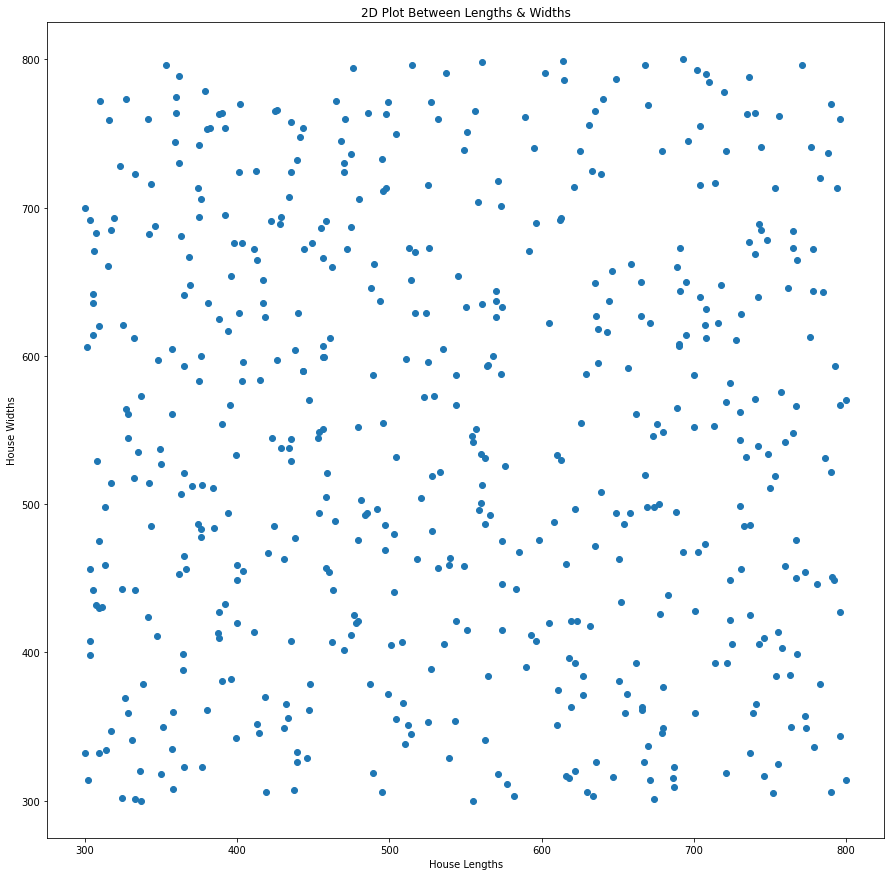

In [89]:
fig = plt.figure(figsize=(15, 15))
plt.scatter(lengths, widths, cmap="viridis")
plt.xlabel('House Lengths')
plt.ylabel('House Widths')
plt.title("2D Plot Between Lengths & Widths")
plt.show()

### 3D Plot

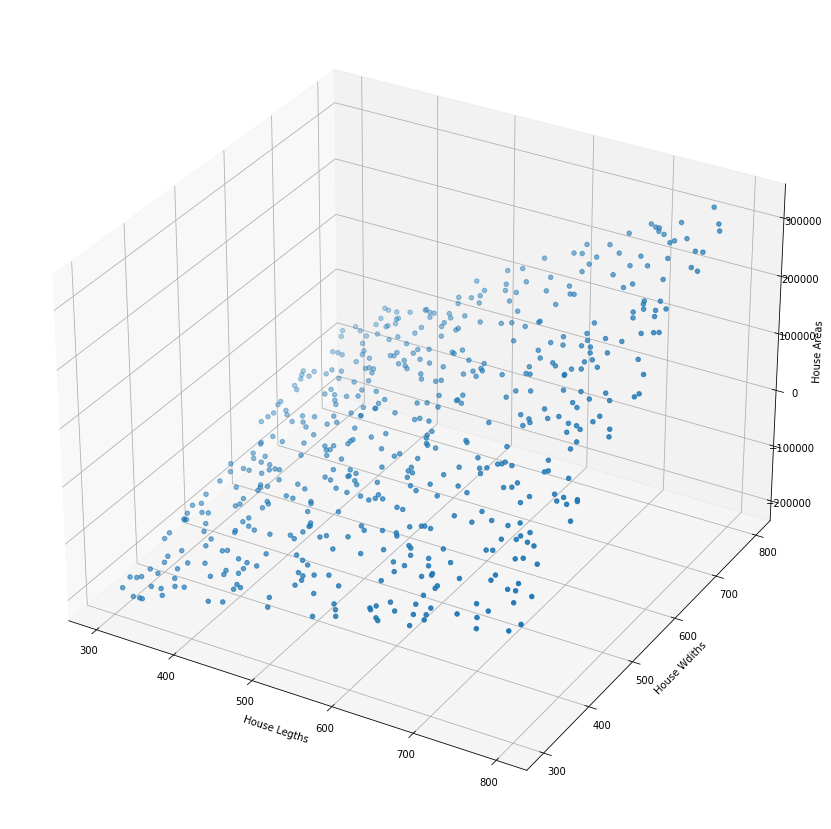

In [88]:
fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection='3d')
ax.scatter3D(lengths, widths, areas)
ax.set_xlabel('House Legths')
ax.set_ylabel('House Wdiths')
ax.set_zlabel('House Areas');

# Task 6

### Covariance

In [90]:
housing_data.cov()

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,4.450867e+11,4.583381e+10,4.310565e+07,3.927680e+07,165328.693915,92595.758473,428502.452199,16290.657771,9679.578703,-54998.854351,1957.561218,69790.104270,-31758.893497,2336.707555,-49329.123125
area,4.583381e+10,1.277520e+10,1.166981e+07,1.106981e+07,2824.302348,2429.217451,-47.240657,-2295.722646,-169.882960,-2791.234822,81.220015,-802.483945,-12170.047052,-2157.056024,-2169.406166
length,4.310565e+07,1.166981e+07,2.200903e+04,-4.514160e+02,7.842978,3.021725,1.111016,-2.517546,1.567701,-1.345467,-1.612858,6.304496,-3.987729,0.298934,-0.002132
width,3.927680e+07,1.106981e+07,-4.514160e+02,2.090209e+04,-0.069954,2.335486,0.790070,-1.291335,-2.176825,-3.605117,1.537962,-6.097865,-16.660719,-4.610193,-3.953842
bedrooms,1.653287e+05,2.824302e+03,7.842978e+00,-6.995413e-02,0.544738,0.138674,0.261589,-0.003096,0.022760,0.034299,0.007117,0.055140,0.088562,0.024747,-0.069256
bathrooms,9.259576e+04,2.429217e+03,3.021725e+00,2.335486e+00,0.138674,0.252476,0.142171,0.007427,0.024329,0.024501,0.007066,0.043689,0.076842,0.013532,-0.054921
stories,4.285025e+05,-4.724066e+01,1.111016e+00,7.900702e-01,0.261589,0.142171,0.752543,0.036809,0.014460,-0.071418,0.003424,0.118480,0.034043,0.016352,-0.069135
mainroad,1.629066e+04,-2.295723e+03,-2.517546e+00,-1.291335e+00,-0.003096,0.007427,0.036809,0.121546,0.012325,0.007326,-0.000860,0.017097,0.061407,0.029567,-0.041601
guestroom,9.679579e+03,-1.698830e+02,1.567701e+00,-2.176825e+00,0.022760,0.024329,0.014460,0.012325,0.146573,0.068025,-0.000826,0.024609,0.012358,0.026137,-0.034491
basement,-5.499885e+04,-2.791235e+03,-1.345467e+00,-3.605117e+00,0.034299,0.024501,-0.071418,0.007326,0.068025,0.228056,0.000438,0.010517,0.021189,0.046216,-0.041025


### Correlation

In [91]:
housing_data.corr()

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.607827,0.435523,0.407210,0.335762,0.276222,0.740398,0.070040,0.037897,-0.172628,0.014013,0.224880,-0.055252,0.008255,-0.097114
area,0.607827,1.000000,0.695952,0.677425,0.033856,0.042773,-0.000482,-0.058259,-0.003926,-0.051712,0.003432,-0.015263,-0.124971,-0.044978,-0.025209
length,0.435523,0.695952,1.000000,-0.021047,0.071629,0.040536,0.008633,-0.048675,0.027602,-0.018991,-0.051918,0.091354,-0.031198,0.004749,-0.000019
width,0.407210,0.677425,-0.021047,1.000000,-0.000656,0.032149,0.006299,-0.025620,-0.039328,-0.052216,0.050802,-0.090670,-0.133752,-0.075153,-0.035919
bedrooms,0.335762,0.033856,0.071629,-0.000656,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.276222,0.042773,0.040536,0.032149,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.740398,-0.000482,0.008633,0.006299,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.070040,-0.058259,-0.048675,-0.025620,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.037897,-0.003926,0.027602,-0.039328,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,-0.172628,-0.051712,-0.018991,-0.052216,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831


# Task 7

### Correlation of Length and Area

In [92]:
housing_data["area"].corr(housing_data["length"])

0.6959524284375517

### Plot between Length and Area

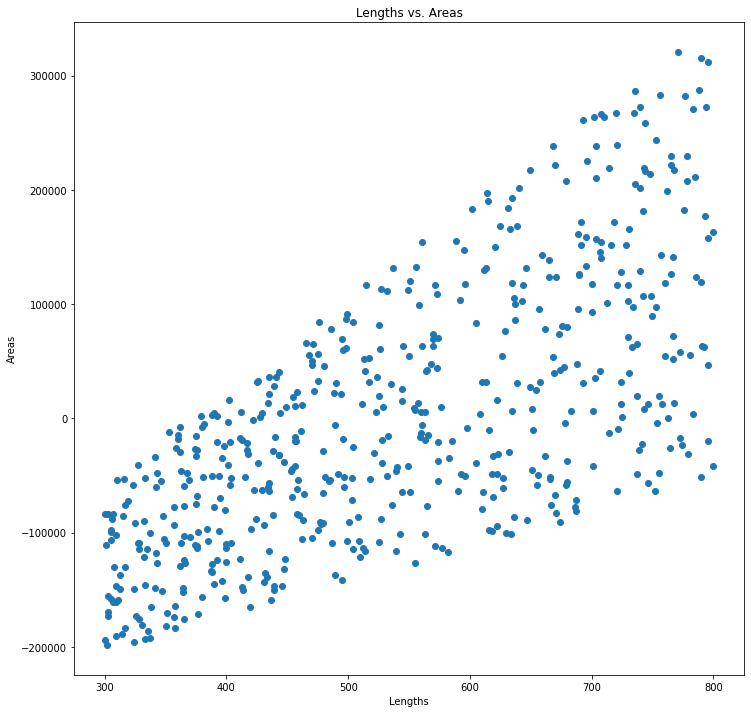

In [95]:
fig = plt.figure(figsize=(12, 12))

plt.scatter(lengths, areas, cmap="viridis")
plt.xlabel("Lengths")
plt.ylabel("Areas")
plt.title("Lengths vs. Areas")
plt.show()

# Task 8

In [7]:
# Sample Space of 3 friends going to city A, B, C, D, E
cities = ["A", "B", "C", "D", "E"]
S = [pro for pro in itertools.product(cities, repeat = 3)]
len(S)

125

In [23]:
two_person_same_city = [pro for pro in S if (pro[0] == pro[1]) or (pro[0] == pro[2]) or (pro[1] == pro[2])]
len(two_person_same_city)

65

In [13]:
prob_two_person_same_city = len(two_person_same_city) / len(S)
prob_two_person_same_city

0.52

In [21]:
all_different_cities = [pro for pro in S if (pro[0] != pro[1]) and (pro[1] != pro[2]) and (pro[0] != pro[2])]
len(all_different_cities)

60

In [22]:
prob_all_different_cities = len(all_different_cities) / len(S)
prob_all_different_cities

0.48

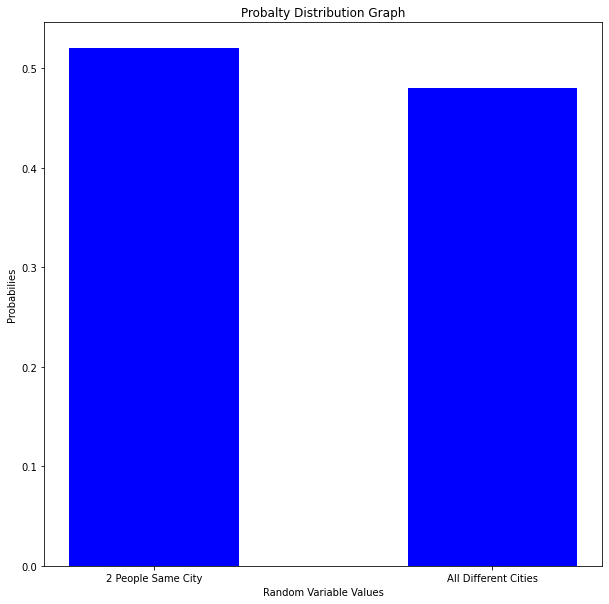

In [27]:
probabilities = [prob_two_person_same_city, prob_all_different_cities]
values = ["2 People Same City", "All Different Cities"]

fig = plt.figure(figsize = (10, 10))

plt.bar(values, probabilities, color ='blue', width = 0.5)
plt.xlabel("Random Variable Values")
plt.ylabel("Probabilies")
plt.title("Probalty Distribution Graph")
plt.show()

In [ ]:
# The Random variable Is Discrete
# It is a TriVariate Problem